In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [14]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [15]:
log_returns = np.log(1 + data.pct_change())

In [16]:
log_returns.tail

<bound method NDFrame.tail of                   PG
Date                
2007-01-03       NaN
2007-01-04 -0.007621
2007-01-05 -0.008624
2007-01-08  0.002202
2007-01-09 -0.002517
...              ...
2021-12-30 -0.008686
2021-12-31  0.004964
2022-01-03 -0.004166
2022-01-04  0.003493
2022-01-05  0.004517

[3780 rows x 1 columns]>

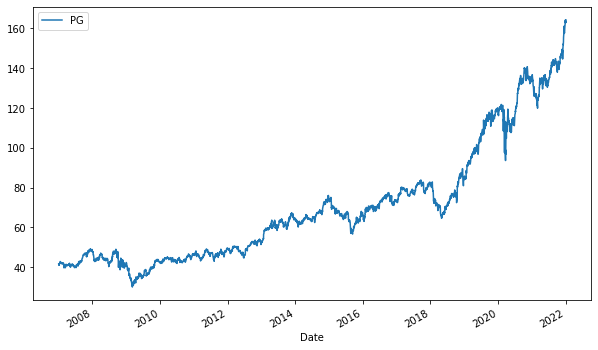

In [17]:
data.plot(figsize=(10,6));

<AxesSubplot:xlabel='Date'>

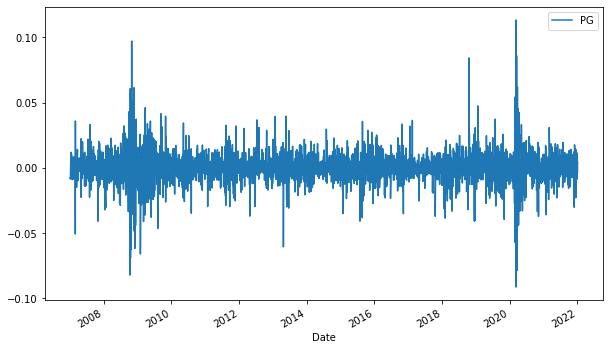

In [18]:
log_returns.plot(figsize=(10,6))

In [19]:
u = log_returns.mean()
u

PG    0.000363
dtype: float64

In [20]:
var = log_returns.var()
var

PG    0.000137
dtype: float64

In [21]:
drift = u-(0.5 * var)
drift

PG    0.000295
dtype: float64

In [22]:
stdev = log_returns.std()
stdev

PG    0.011709
dtype: float64

In [23]:
type(drift)

pandas.core.series.Series

In [24]:
type(stdev)

pandas.core.series.Series

In [25]:
np.array(drift)

array([0.00029485])

In [26]:
drift.values

array([0.00029485])

In [27]:
stdev.values

array([0.01170903])

In [29]:
x = np.random.rand(10,2)
x

array([[0.87660802, 0.69211929],
       [0.61017918, 0.73018865],
       [0.95476008, 0.23382041],
       [0.55174282, 0.72315981],
       [0.66363292, 0.35306448],
       [0.87398262, 0.08441902],
       [0.48176126, 0.6674641 ],
       [0.08087627, 0.52067282],
       [0.43022935, 0.30648189],
       [0.52270249, 0.2013188 ]])

In [30]:
norm.ppf(x)

array([[ 1.15819623,  0.50186652],
       [ 0.27978606,  0.61338363],
       [ 1.69287195, -0.72632294],
       [ 0.13006581,  0.5922542 ],
       [ 0.42239853, -0.37706007],
       [ 1.14542113, -1.37594699],
       [-0.04573367,  0.43292149],
       [-1.39920157,  0.0518423 ],
       [-0.17579028, -0.50584739],
       [ 0.05693746, -0.83691988]])

In [35]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.45564309,  0.16455544],
       [-0.93348797,  0.57142113],
       [-0.16839316,  1.34503744],
       [-0.6752863 ,  1.44522528],
       [ 0.60850603,  0.44783118],
       [-0.2190444 ,  0.17937622],
       [-0.79314951, -1.03424707],
       [ 0.42793269, -0.20572565],
       [-0.8458693 ,  1.04245143],
       [-0.378359  , -1.30703079]])

In [36]:
t_intervals = 1000
iterations = 10

In [37]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [38]:
daily_returns

array([[1.00013694, 0.9888265 , 0.99463099, ..., 1.0001636 , 0.99684811,
        0.98507238],
       [1.00067409, 0.98753983, 0.99666073, ..., 0.99820011, 0.9982127 ,
        1.00005065],
       [0.9949378 , 1.0047684 , 0.99480716, ..., 1.01848835, 1.00951842,
        1.00623229],
       ...,
       [0.99247538, 0.99968968, 1.00144238, ..., 0.97172434, 1.00444756,
        0.99235097],
       [1.0046699 , 1.0106857 , 1.0204814 , ..., 1.00380343, 0.98628574,
        1.0133411 ],
       [1.00516283, 0.99461314, 1.00410488, ..., 1.00850208, 0.99943893,
        0.99650705]])

In [39]:
S0 = data.iloc[-1]
S0

PG    164.210007
Name: 2022-01-05 00:00:00, dtype: float64

In [40]:
price_list = np.zeros_like(daily_returns)

In [42]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
price_list[0] = S0
price_list

array([[164.21000671, 164.21000671, 164.21000671, ..., 164.21000671,
        164.21000671, 164.21000671],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [45]:
price_list

array([[164.21000671, 164.21000671, 164.21000671, ..., 164.21000671,
        164.21000671, 164.21000671],
       [164.32069889, 162.1639228 , 163.66166566, ..., 163.91444675,
        163.91651484, 164.21832314],
       [163.48887517, 162.93718459, 162.8117964 , ..., 166.94495414,
        165.47674065, 165.2417786 ],
       ...,
       [330.24505419, 111.37052971, 169.43284764, ..., 219.66448733,
        398.12688594, 294.15899445],
       [331.78726461, 112.56060132, 172.90306946, ..., 220.49996627,
        392.66687082, 298.0833983 ],
       [333.50022689, 111.95425367, 173.6128163 , ..., 222.37467493,
        392.44655665, 297.04220892]])

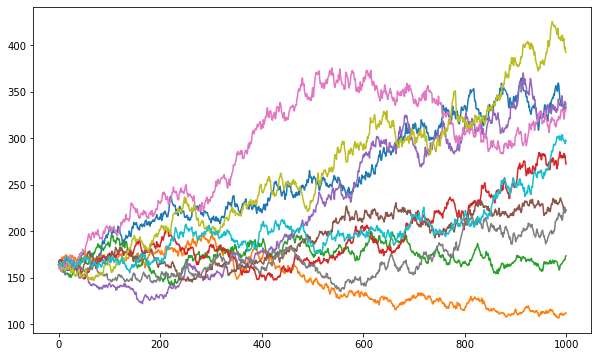

In [47]:
plt.figure(figsize=(10,6))
plt.plot(price_list)